In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mnist_test.csv to mnist_test.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (70,20)
plt.rcParams["font.size"] = 25

In [ ]:
def gradientdescent(t, alpha, X):
  w = [0,0]
  for i in range(t):
    step = [0,0]
    
    for i in range(len(X)):
      step[0] = step[0] + 2*X[i][0]*(w[0]*X[i][0] + w[1] - X[i][1])
      step[1] = step[1] + 2*(w[0]*X[i][0] + w[1] - X[i][1])

    w[0] = w[0] - alpha*step[0]
    w[1] = w[1] - alpha*step[1]

  return w

In [ ]:
f = open("linear.txt", "r")
X = []
count = 1

for r in f:
  data = []
  if(count==1):
    count = 2
    continue 
  for i in r.split():
    data.append(float(i))
  X.append(data)

X = np.array(X)

In [ ]:
w = gradientdescent(1000, 0.01, X)
print(w)

[1.8531701298701293, 1.5525919047619046]


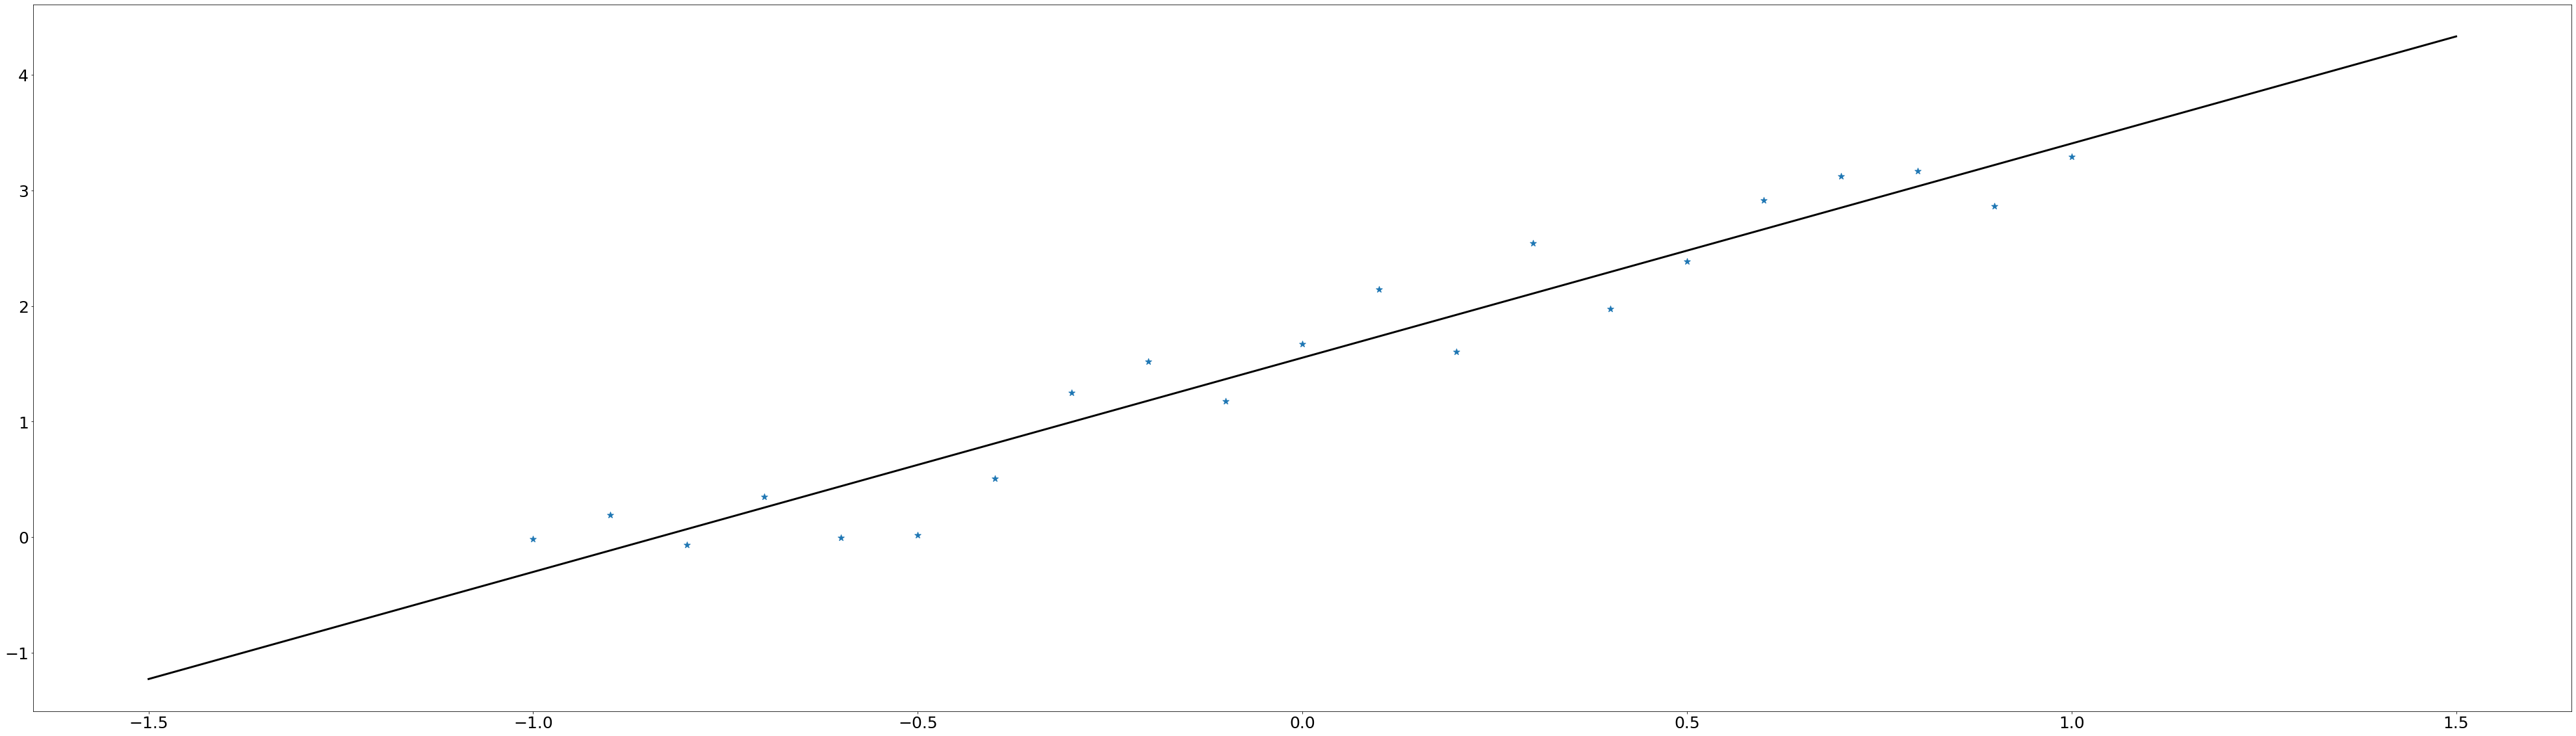

In [ ]:
plt.scatter(X[:,0], X[:,1], s = 100, marker = "*")

x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, w[0]*x + w[1],color = 'k', linewidth = 3)

In [ ]:
f = open("logistic.txt", "r")
features = []
classes = []

count = 1
for r in f:
  
  if(count == 1):
    count =2
    continue 
  
  arr = r.split()
  nfeatures = []
  nclasses = []

  for i in range(len(arr)):
    if(i==len(arr)-1):
      continue 
    nfeatures.append(float(arr[i]))

  nfeatures.append(float(1))
  nclasses.append(float(arr[len(arr)-1]))

  features.append(nfeatures)
  classes.append(nclasses)

features = np.array(features)
classes = np.array(classes)


In [ ]:
def sigmoid(x):
  # [[][][]] -> 
  # tempshape = np.shape(x)

  # x = x.reshape((1,-1))
  # # ans = -1
  # for i in range(len(x)):
  #   if(x[i]<-5000):
  #     x = 0
  #   elif(x[i]>100000):
  #     x = 1 
  
  # if(x == -1):
  #   x = 1/(1+ np.exp(-1*x))

  # x = np.reshape(x,tempshape)
  # # return x 

  # tmp = x
  # tsize = a.shape
  # tmp.reshape(-1)
  
  # for i in range(len(tmp)):
  #     if (tmp[0][i]<=-500):
  #       tmp[i] = 0
  #     elif (tmp[0][i]>=10000):
  #       tmp[i] = 1
  #     else:
  #       tmp[0][i] = (1/(1 + np.exp(-1*tmp[0][i])))
  #   # print(tmp)  
  # tmp.reshape(tsize)
  # return(tmp)


  return 1/(1+ np.exp(-1*x))

In [ ]:
classes = np.array([[-1],[1],[1],[-1]])
features = np.array([[10,0,1],[-10,0,1], [1,1,1], [-1,1,1]])
# print(type(features[0]))

In [ ]:
import numpy as np

In [ ]:
def logistic(features, classes, alpha, t):

  ndata = len(features)
  n = len(features[0])
  w1 = np.zeros(n)

  # print(np.shape(features))
  # print(np.shape(classes))
  # print(np.shape(w1))

  for _ in range(t):
    
    step = np.zeros(n)

    for i in range(ndata):
      step = step + (1-sigmoid(classes[i]*np.dot(features[i],w1)))*classes[i]*features[i] 
    
    w1 = w1 + alpha*step

  return w1


In [ ]:
w = logistic(features,classes, 0.01, 10000)
print(w)

[-0.28065602  0.          0.        ]


In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


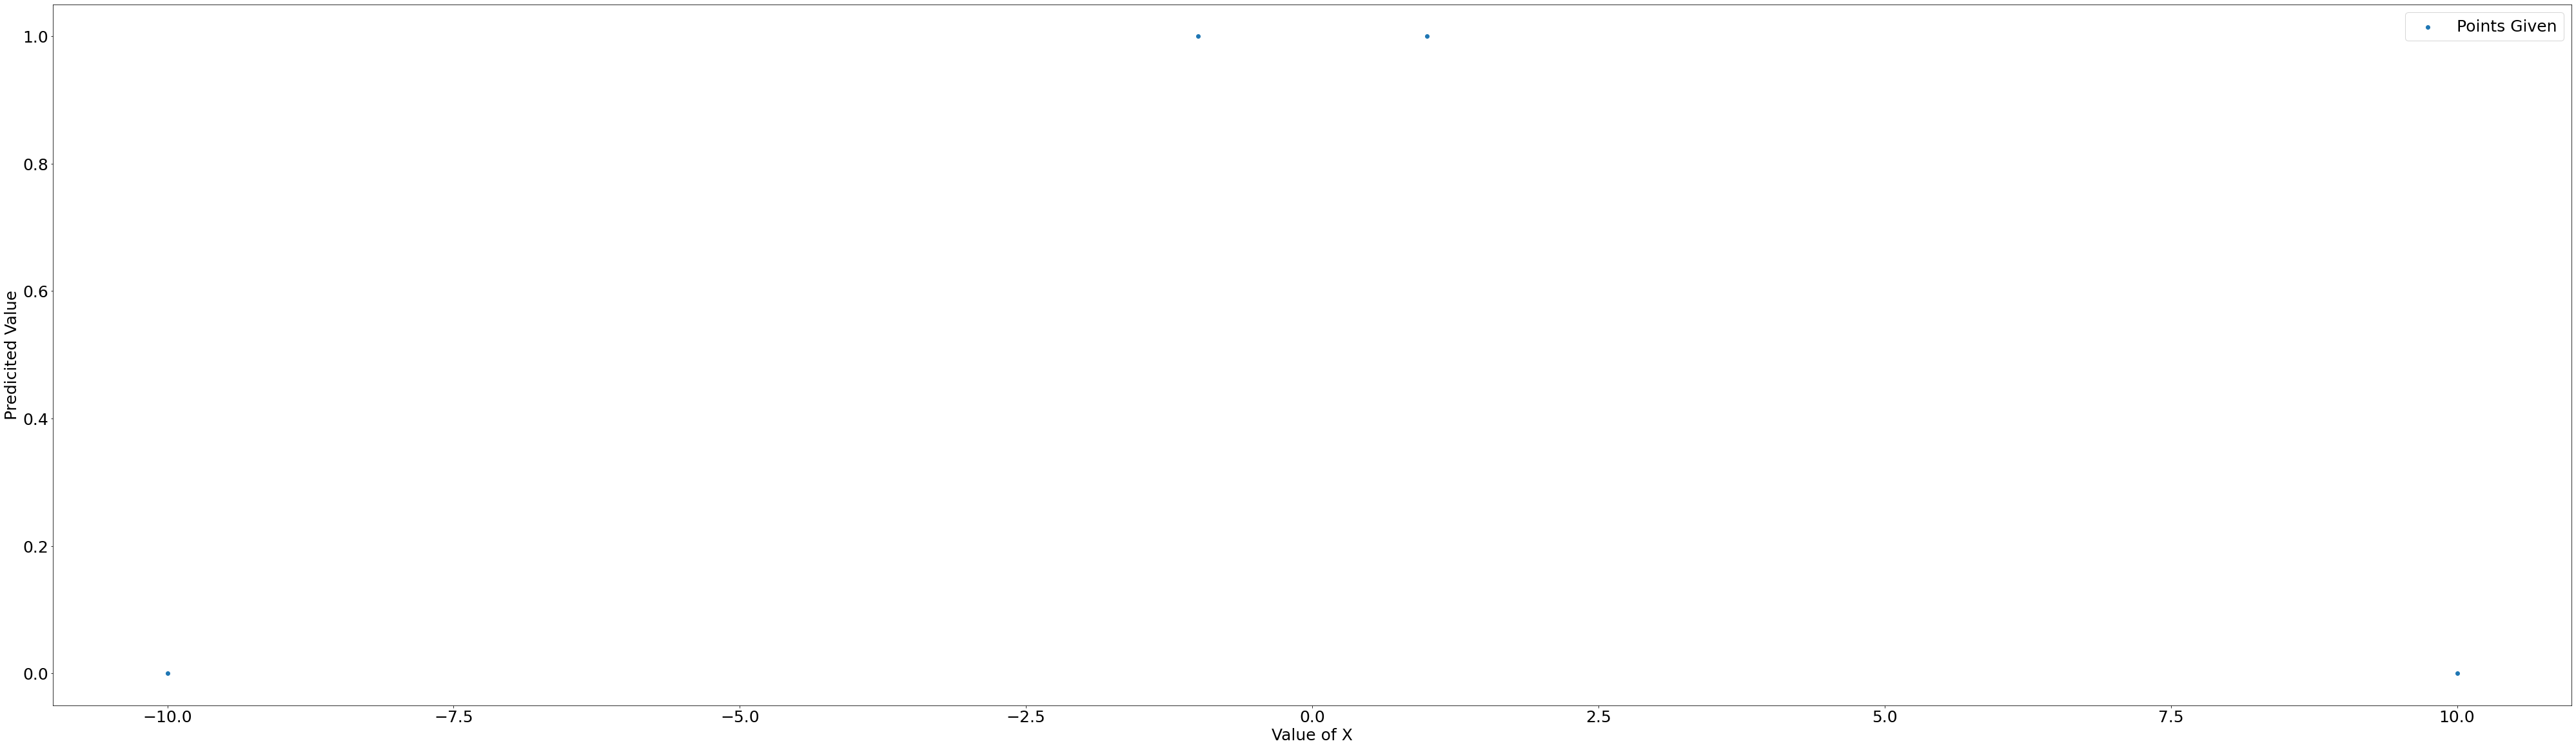

In [ ]:
Xplot = np.linspace(-2, 2, 100)
plt.scatter(features[:,0], features[:,1], label = "Points Given")
Yplot = -w[2]/w[1] - (w[0]/w[1])*Xplot
plt.plot(Xplot, Yplot)
plt.xlabel("Value of X")
plt.ylabel("Predicited Value")
plt.legend()

In [ ]:
import csv

features1 = []
classes1 = []

with open('/content/mnist_train.csv', 'r') as file:
    
    reader = csv.reader(file) 
    for r in reader:
      # print(type(r))
      nfeatures = []
      nclasses = []

      if r[0] == '4':
        nclasses.append(float(1))

        for i in range(1,len(r)):
          nfeatures.append(float(r[i]))
        nfeatures.append(float(1))
        
        classes1.append(nclasses)
        features1.append(nfeatures) 

    
      if r[0] == '7':
        nclasses.append(float(-1))

        for i in range(1,len(r)):
          nfeatures.append(float(r[i]))
        
        nfeatures.append(float(1))
        
        classes1.append(nclasses)
        features1.append(nfeatures)

features1 = np.array(features1)
classes1 = np.array(classes1)

In [ ]:
wobtained = logistic(features1, classes1, 0.01, 1000)

(12107, 785)
(12107, 1)
(785,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


In [ ]:
import csv

testfeatures1 = []
testclasses1 = []

with open('/content/mnist_test.csv', 'r') as file:
    
    reader = csv.reader(file) 
    for r in reader:
      # print(type(r))
      nfeatures = []
      nclasses = []

      if r[0] == '4':
        nclasses.append(float(1))

        for i in range(1,len(r)):
          nfeatures.append(float(r[i]))
        
        testclasses1.append(nclasses)
        testfeatures1.append(nfeatures) 

    
      if r[0] == '7':
        nclasses.append(float(-1))

        for i in range(1,len(r)):
          nfeatures.append(float(r[i]))

        nfeatures.append(1)
        
        testclasses1.append(nclasses)
        testfeatures1.append(nfeatures)

testfeatures1 = np.array(features1)
testclasses1 = np.array(classes1)

In [ ]:
def testlogistic(testfeatures, testclasses, w):
  
  r = 0
  for i in range(len(testfeatures)):
    x = testclasses[i]*np.dot(w,np.array(testfeatures[i])) 

    if(x>0):
      r+=1

  return r

In [ ]:
x = (len(testfeatures1))
y = testlogistic(testfeatures1, testclasses1, wobtained)

print(str(y/x*100)+ "%")

99.21532997439499%
